In [271]:
#%matplotlib notebook
%matplotlib inline 
import matplotlib.pyplot as plt

# SciPy

`SciPy`以NumPy的数组计算处理功能为基础，提供了用于处理科学计算常用的方法：积分、取函数最大、最小值，取稀疏矩阵的特征向量，判断两个分布模式是否相同，等等。

## 最优化和最小化

SciPy提供的最优化处理包可以用于解决最小化的问题。典型的最小化问题是执行线性回归，查找函数的最小和最大值，取函数的根，判断两个函数是否相交。

`注意`：NumPy和SciPy提供的最优化和最小化工具中不含马尔可夫链蒙特卡罗(Markov Chain Monte Carlo (MCMC))功能——即，贝叶斯分析。

### 数据建模和拟合

有多种方式对数据进行线性回归拟合。如曲线拟合`curve_fit`，它是$ x^2 $的（即，最佳拟合方法）。下面示例数据用函数生成，并添加噪音，将这些带噪音的数据使用curve_fit进行拟合。用于拟合的线性方程是$ f(x) = ax + b $

In [176]:
import numpy as np
from scipy.optimize import curve_fit

#实际模型和数据生成函数
def func(x,a,b):
    return a * x + b

#干净数据
x = np.linspace(0,10,100)
y = func(x,1,2)

#添加噪声
yn = y + 0.9 * np.random.normal(size=len(x))

#在噪声数据上进行拟合
popt, pcov = curve_fit(func,x,yn)

#popt是最佳拟合参数
print(popt)

#可以通过pcov检查拟合的质量，它的对角元素是每组参数的方差
print(pcov)

[ 1.04801651  2.04198566]
[[ 0.00075474 -0.0037737 ]
 [-0.0037737   0.02528505]]


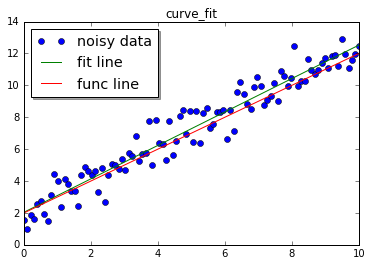

In [177]:
yt = func(x,popt[0],popt[1])
plt.figure(1)

#噪声数据
plt.plot(x,yn,'o',label="noisy data")

#拟合数据曲线
plt.plot(x,yt,label="fit line")

#干净数据直线
plt.plot(x,y,label="func line")

plt.title('curve_fit')
plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

`popt`保存有最佳拟合参数。通过`pcov`可以检测拟合质量，它的对角元素是每组参数的方差。

我们也可以使用最小二乘法拟合高斯分布，它是一个非线性函数：
$$
a * exp \left( \frac{- (x - \mu)^2}{2\sigma^2} \right)
$$

In [178]:
#模型的数据生成函数
def func(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

#生成干净数据
x = np.linspace(0,10,100)
y = func(x,1,5,2)

#添加噪声
yn = y + 0.2 * np.random.normal(size=len(x))

#进行拟合
popt,pcov = curve_fit(func,x,yn)

popt


array([ 0.9371463 ,  5.11810165,  2.22927392])

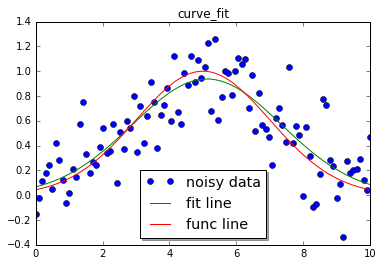

In [179]:
yt = func(x,popt[0],popt[1],popt[2])
plt.figure(1)

#噪声数据
plt.plot(x,yn,'o',label="noisy data")

#拟合数据曲线
plt.plot(x,yt,label="fit line")

#干净数据直线
plt.plot(x,y,label="func line")

plt.title('curve_fit')
plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

上面对高斯分布的拟合是在可接受范围之内的。

实际上我们可以使用一维数据，进行多次高斯分布。比如在func中进行两次高斯公式计算。

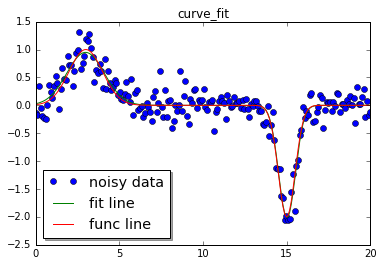

In [180]:
#两次高斯模型
def func(x,a0,b0,c0,a1,b1,c1):
    return a0*np.exp(-(x-b0)**2/(2*c0**2)) + a1*np.exp(-(x-b1)**2/(2*c1**2))

#生成干净数据
x = np.linspace(0,20,200)
y = func(x,1,3,1,-2,15,0.5)

#添加噪声
yn = y + 0.2 * np.random.normal(size=len(x))

#由于我们进行的是复杂函数拟合，因此提供猜测值会让拟合效果更好
guesses = [1,3,1,1,15,1]
#进行拟合
popt,pcov = curve_fit(func,x,yn,p0=guesses)

yt = func(x,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])
plt.figure(1)

#噪声数据
plt.plot(x,yn,'o',label="noisy data")

#拟合数据曲线
plt.plot(x,yt,label="fit line")

#干净数据直线
plt.plot(x,y,label="func line")

plt.title('curve_fit')
plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

### 解函数

Scipy的`optimze`模块中提供了一些工具处理“求函数的根？找出两个函数的交点？”之类的问题。

如：求等式的根：

[-3.]


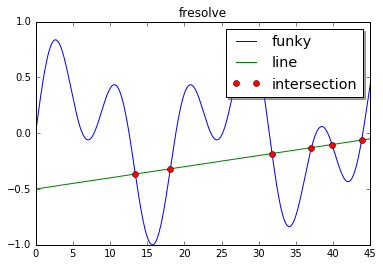

In [181]:
from scipy.optimize import fsolve

#解方程
line = lambda x: x + 3

#第二个参数是初始的猜测值
solution = fsolve(line,0)
print(solution)

#找出函数交点

def findIntersection(func1,func2,x0):
    return fsolve(lambda x: func1(x) - func2(x), x0)

funky = lambda x: np.cos(x/5) * np.sin(x/2)
line = lambda x: 0.01 * x - 0.5

x = np.linspace(0,45,10000)
#交点x
result = findIntersection(funky,line,[15,20,30,35,40,45])

plt.figure(1)

#曲线
plt.plot(x,funky(x),label="funky")

#直线
plt.plot(x,line(x),label="line")

#交点
plt.plot(result,line(result),'o',label="intersection")

plt.title('fresolve')
plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

需要注意的是猜测值`[15,20,30,35,40,45]`是非常重要的，如果它们不正确，有可能获取不到希望的结果。

## 插值

包含信息的数据通常是函数形式的，作为分析者的我们想要对它进行建模。向给定的数据集中提供数据点的中间值有利于了解和预测非采样区域的数据。SciPy提供了很多用于插值处理的功能，从简单的单变量到复杂的多变量。单变量插值用于样本数据的受一个单独的变量影响，多变量插值则假设受到一个以上的变量的影响。

有两种类型的插值：

 - 使用单个函数拟合整个数据集
 - 使用多个函数拟合数据集的不同部分，函数间的连接点是平滑的
 
 第二种类型被称为“样条插值（spline interpolation）”，它在处理复杂数据时是非常强的。
 
示例：

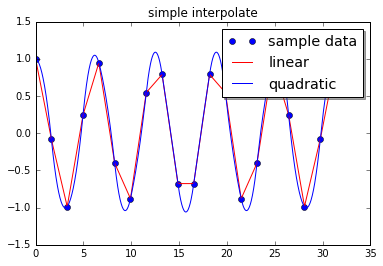

In [182]:
from scipy.interpolate import interp1d

#模拟数据
x = np.linspace(0,10*np.pi,20)
y = np.cos(x)

#插值数据
fl = interp1d(x,y,kind='linear')
fq = interp1d(x,y,kind='quadratic')

#x.min和x.max用于确定数据边界
xint = np.linspace(x.min(),x.max(),1000)
yintl = fl(xint)
yintq = fq(xint)

plt.figure(1)

#样本点
plt.plot(x,y,'o',label="sample data")

#线性
plt.plot(xint,yintl,label="linear",color="red")

#二次
plt.plot(xint,yintq,label="quadratic",color="blue")

plt.title('simple interpolate')
plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

二次拟合的情况明显更好一些，因此选择合适的插值参数（类型？）是非常重要的。

下例是针对噪声数据的插值，这里使用的函数是`scipy.interpolate.UnivariateSpline`。

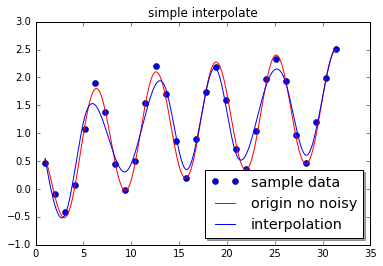

In [183]:
from scipy.interpolate import UnivariateSpline

#模拟30个样本数据
sample = 30
x = np.linspace(1,10*np.pi,sample)
y = np.cos(x) + np.log10(x) + np.random.randn(sample)/10

#多变量插值，s是平滑因子，如果它为0，则插值将经过所有的点
f = UnivariateSpline(x,y,s=1)

xint = np.linspace(x.min(),x.max(),1000)
yint = f(xint)

yorigin = np.cos(xint) + np.log10(xint) #+ np.random.randn(1000)/10


#样本点
plt.plot(x,y,'o',label="sample data")

plt.plot(xint,yorigin,label="origin no noisy",color="red")

plt.plot(xint,yint,label="interpolation",color="blue")

plt.title('simple interpolate')
plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

下例使用多变量插值，处理图像的重建，使用的`scipy.interpolate.griddata`函数，它用于处理多维非结构化数据。比如从 $1000 x 1000$的图像中，随机选择1000个点，重建图像。

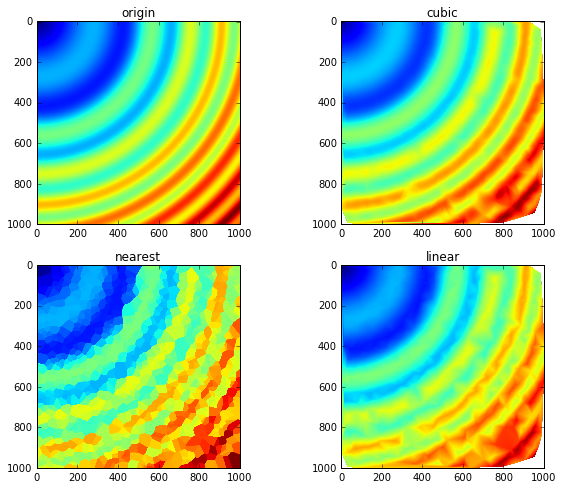

In [184]:
from scipy.interpolate import griddata
from scipy.misc import toimage

#希望插值的函数
ripple = lambda x,y: np.sqrt(x**2 + y**2) + np.sin(x**2 + y**2)

#生成用于插值的网格（向这个网格插值）。
#复数用于定义网格数据的步数。如果没有这个复数，
#mgrid方法将只创建一个5步的数据结构。
#下面创建两个1000x1000的grid，如果没有复数1000j，就会创建为5x5
grid_x,grid_y = np.mgrid[0:5:1000j,0:5:1000j]

#用于生成插值的样本数据（只有此部分的数据是已知的，需要通过插值还原出gird中的其它点）
xy = np.random.rand(1000,2) 
sample = ripple(xy[:,0]*5, xy[:,1]*5) 

#griddata?

#立方体插值
# xy*5 样本数据点坐标
# sample 样本数据点的值
# (grid_x,grid_y) 插值位置
# method 插值方法，cubic为立方体插值
grid_z0 = griddata(xy * 5,sample,(grid_x,grid_y),method='cubic')
grid_z1 = griddata(xy * 5,sample,(grid_x,grid_y),method='nearest')
grid_z2 = griddata(xy * 5,sample,(grid_x,grid_y),method='linear')

#10x8英寸
plt.figure(figsize=(10,8))
plt.title('griddata')

ax = plt.subplot(221)
ax.set_title('origin')
#使用原始函数生成的图像（即，原图）
plt.imshow(ripple(grid_x,grid_y))

ax = plt.subplot(222)
ax.set_title('cubic')
#插值所生成的图
plt.imshow(grid_z0)

ax = plt.subplot(223)
ax.set_title('nearest')
#插值所生成的图
plt.imshow(grid_z1)

ax = plt.subplot(224)
ax.set_title('linear')
#插值所生成的图
plt.imshow(grid_z2)

在图像处理中，采样越多，则还原效果越好。另一个插值函数是`scipy.interpolate.SmoothBivariateSpline`，但是它对样本数据也更敏感，griddata的可靠性则更好一些。

## 积分
SciPy提供的积分功能主要是针对数值计算的。如果需要处理的是不定积分，可以使用SymPy。

### 解析积分

下例计算 $\int_0^3 \cos^2 (e^x)\, dx $

(1.296467785724373, 1.397797186265988e-09)


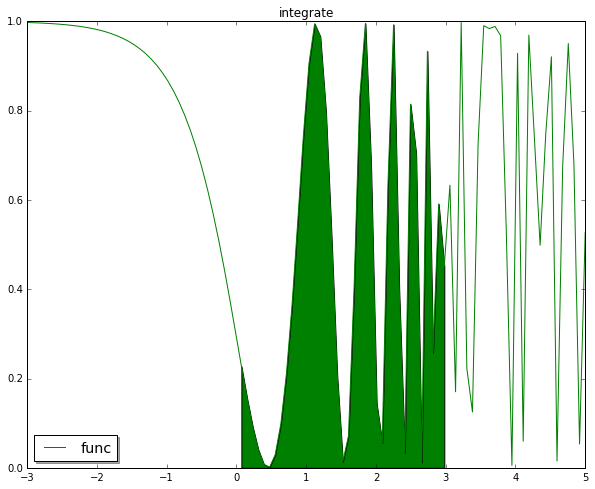

In [185]:
from scipy.integrate import quad,trapz

func = lambda x: np.cos(np.exp(x)) ** 2

#积分
solution = quad(func,0,3)
print(solution)

plt.figure(figsize=(10,8))
plt.title('integrate')
x = np.linspace(-3,5,100)
y = func(x)
plt.plot(x,y,'g-',label='func')

index = (x>=0) & (x<=3)
plt.fill_between(x[index],y[index],facecolor='green', interpolate=True)
#ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)
#ax.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)

#barx = np.linspace(0,3,50)
#bary = func(barx)
#plt.bar(barx,bary,width=0.04,linewidth=0.02)

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show() 

### 数值积分

给定的是数值而非公式时进行积分计算。`quad`可以处理函数积分，`trapz`用于处理数值积分。

0.0385901320445


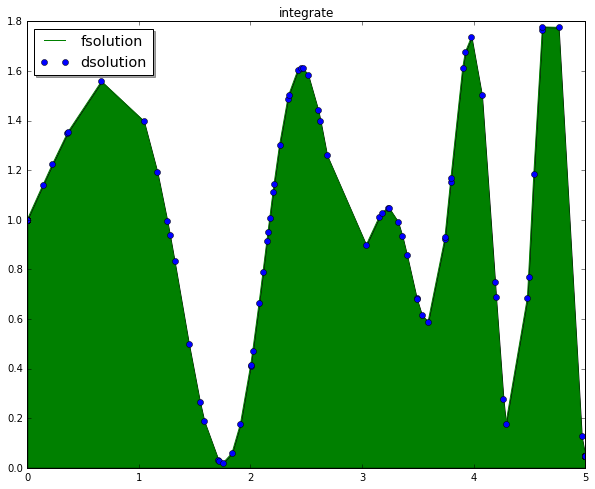

In [186]:
#模拟数据
x = np.sort(np.random.randn(150) * 4 + 4).clip(0,5)
func = lambda x: np.sin(x) * np.cos(x ** 2) + 1
y = func(x)

#0-5之间
fsolution = quad(func,0,5)
dsolution = trapz(y,x=x)

#解析积分和数值积分差值
print(str(np.abs(fsolution[0]-dsolution)))

plt.figure(figsize=(10,8))
plt.title('integrate')
plt.plot(x,y,'g-',label='fsolution')
plt.plot(x,y,'o',label='dsolution')

plt.fill_between(x,y,facecolor='green', interpolate=True)
plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show() 

## 数据统计

NumPy提供了基础的统计功能如：`mean`，`std`，`median`，`argmax`，`argmin`。

SciPy提供了用于统计学的工具如：分布(连续和离散)和统计函数。

In [187]:
x = np.random.randn(1000)
mean = x.mean()
print(mean)
std = x.std()
print(std)
var = x.var()
print(var)

0.0580422470562
0.998306098365
0.996615066034


### 连续和离散分布

有大约80种连续分布和超过10种离散分布。在`scipy.stats`包中包含了20种概率密度函数（即PDF，都是连续函数）。这些分布函数用于随机数生成时非常有用。

![20种连续分布函数](images/figure3-12.png "20种连续分布函数")

从`scipy.stats`中调用分布函数时有几种方式：概率密度函数（PDF)、累积分布函数（CDF）、随机变量采样（RVS）、百分比点函数（PPF）。

例：$ PDF = e^{(-x^2/2)}\sqrt{2\pi} $

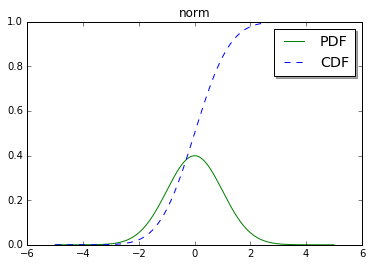

In [188]:
#从统计学处理包中导入norm(普通连续随机变量)
from scipy.stats import norm

x = np.linspace(-5,5,1000)
 
# loc用于指定均值（mean），scale指定标准偏差（deviation）
dist = norm(loc=0, scale=1)

#获取PDF和CDF，norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)
pdf = dist.pdf(x)
cdf = dist.cdf(x)

#500随机样本
sample = dist.rvs(500)

#print sample

plt.title('norm')
plt.plot(x,pdf,'g-',label='PDF')
plt.plot(x,cdf,'b--',label='CDF')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show() 


### 统计函数（分布检测函数）

SciPy中有超过60种统计函数。统计函数通常用于描述和检测样本——比如：柯尔莫哥洛夫斯米尔诺夫的频率测试，等。

SciPy提供了大量的分布。在`stats`包中，可以使用`kstest`和`normaltest`等函数来对样本进行检测。这些分布检测函数可以检测样本是否为某个指定的分布类型，应该要确保你对数据的了解程度，以免错误的解读这些检测函数的结果。

In [195]:
from scipy import stats

sample = np.random.randn(100)

out = stats.normaltest(sample)
print('normaltest output')
print('Z-score = ' + str(out[0]))
print('P-value = ' + str(out[1]))

# kstest is the Kolmogorov-Smirnov test for goodness of fit.
# Here its sample is being tested against the normal distribution.
# D is the KS statistic and the closer it is to 0 the better.
out = stats.kstest(sample, 'norm')
print('\nkstest output for the Normal distribution')
print('D = ' + str(out[0]))
print('P-value = ' + str(out[1]))

# Similarly, this can be easily tested against other distributions,
# like the Wald distribution.
out = stats.kstest(sample, 'wald')
print('\nkstest output for the Wald distribution')
print('D = ' + str(out[0]))
print('P-value = ' + str(out[1]))

normaltest output
Z-score = 3.30772551089
P-value = 0.191309497725

kstest output for the Normal distribution
D = 0.0680837830281
P-value = 0.757126631603

kstest output for the Wald distribution
D = 0.543010724508
P-value = 0.0


研究人员通常使用描述性函数来进行统计。`stats`包中有一些描述性函数，包括几何平均数（geometric mean）`gmean`，样本偏态（skewness）`skew`，和频繁项集`itemfreq`。

In [198]:
sample = np.random.randn(100)

out = stats.hmean(sample[sample > 0])
#调和平均数()
print ('Harmonic mean = '+str(out))

out = stats.tmean(sample,limits=(-1,1))
print('\nTrimmed mean= '+str(out))

out = stats.skew(sample)
print('\nSkewness = ' + str(out))

#样本描述信息
out = stats.describe(sample)
print('\nSize = ' + str(out[0]))
print('Min = ' + str(out[1][0]))
print('Max = ' + str(out[1][1]))
print('Mean = ' + str(out[2]))
print('Variance = ' + str(out[3]))
print('Skewness = ' + str(out[4]))
print('Kurtosis = ' + str(out[5]))

Harmonic mean = 0.172810517039

Trimmed mean= 0.0522147469768

Skewness = -0.0500228673165

Size = 100
Min = -2.50308583453
Max = 2.18483187013
Mean = 0.0537000701222
Variance = 0.91800078091
Skewness = -0.0500228673165
Kurtosis = -0.290299005483


如果需要更强的统计工具可以了解`RPy`。如果SciPy和NumPy需要的统计功能能满足要求，但需要更强的自动分析能力，则可以了解`Pandas`。

## 空间和聚类分析
空间和聚类分析用于模式识别、分组、聚簇。

SciPy中提供了空间分析类`scipy.spatial`和聚类分析类`scipy.cluster`。空间分析类中包括了用于分析点距离（如k-d tree）的函数。聚类分析类则提供了两个子类：矢量量化（`vq`）和分层聚类（`hierarchy`）。矢量量化使用重心对数据点（向量）进行分组。分层聚类则包含了构造聚簇和分析其子结构的功能。

### 矢量量化
矢量量化这是个一般化的术语，它通常与信号处理、数据压缩、聚类相关。这里只关注聚类，将数据发送给`vq`包，然后标识出聚簇。

1.32493830505
(50, 2, 100, 2, 30, 2)


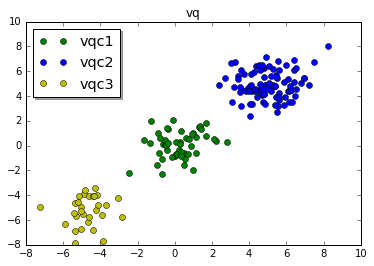

In [229]:
from scipy.cluster import vq

# 数据
c1 = np.random.randn(100,2) + 5
c2 = np.random.randn(30,2) - 5
c3 = np.random.randn(50,2)

# 将数据堆叠为180 x 2的数组，100+30+50
data = np.vstack([c1,c2,c3])

# 使用kmeans计算聚类中心(cluster centroid)和方差(variance)
centroids, variance = vq.kmeans(data,3)

print(variance)

# identified变量包含用于分隔数据点的信息
identified, distance = vq.vq(data, centroids)

vqc1 = data[identified == 0]
vqc2 = data[identified == 1]
vqc3 = data[identified == 2]

# 看是否覆盖所有点
print(vqc1.shape+vqc2.shape+vqc3.shape)

plt.title('vq')
plt.plot(vqc1[:,0],vqc1[:,1],'go',label='vqc1')
plt.plot(vqc2[:,0],vqc2[:,1],'bo',label='vqc2')
plt.plot(vqc3[:,0],vqc3[:,1],'yo',label='vqc3')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show() 

上图中针对的是干净的数据，对于有噪声的数据（部分类型的数据是均匀分布的）的处理是`vq.kmeans`的弱项。

### 分层聚类

分层聚类在标识嵌入在大型结构中的子结构时非常强大。但处理它的结果是非常棘手的，因为它并不能像`kmeans`地样清楚的标示出聚类。

下例中生成了一个包含多个聚类的系统。为使用分层聚类功能，我们构造了一个距离矩阵，并输出了系统树图。


<IPython.core.display.Javascript object>


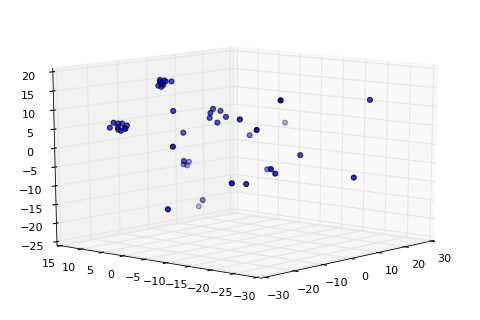

<IPython.core.display.Javascript object>


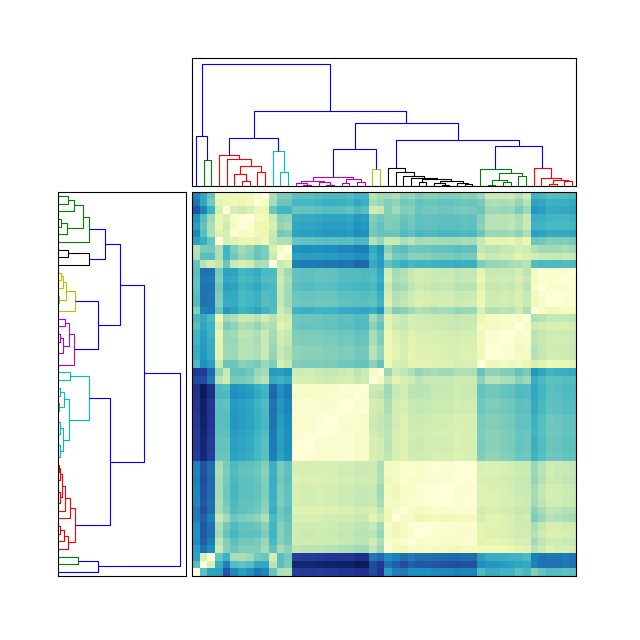

In [311]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as hy

# 创建包含多个簇的簇的函数
def clusters(number = 20, cnumber = 5, csize = 10):
    # Note that the way the clusters are positioned is Gaussian randomness.
    rnum = np.random.rand(cnumber, 2)
    rn = rnum[:,0] * number
    rn = rn.astype(int)
    rn[np.where(rn < 5 )] = 5
    rn[np.where(rn > number/2. )] = round(number / 2., 0)
    ra = rnum[:,1] * 2.9
    ra[np.where(ra < 1.5)] = 1.5
    
    # cls是额外的离散点
    cls = np.random.randn(number, 3) * csize
    
    # rxyz用于计算每个簇的中心，减1应该是为了保留一个位置随机的簇
    # csize应该是为了扩大簇心之间的距离，因为tmp中的值没有经过csize放大，对坐标值的影响较小
    # Random multipliers for central point of cluster
    rxyz = np.random.randn(cnumber-1, 3) 
    for i in xrange(cnumber-1):
        tmp = np.random.randn(rn[i+1], 3) #一簇数据
        #print rn[i+1],":",tmp
        x = tmp[:,0] + ( rxyz[i,0] * csize )
        y = tmp[:,1] + ( rxyz[i,1] * csize )
        z = tmp[:,2] + ( rxyz[i,2] * csize )
        
        tmp = np.column_stack([x,y,z])
        
        cls = np.vstack([cls,tmp])
        #如果不使用初始的cls离散点，则可以清晰的看到各个簇
        #print 'i=',str(i),str(len(tmp)),tmp
        #if i > 0:
        #    cls = np.vstack([cls,tmp])
        #else:
        #    cls = np.vstack([tmp])
    return cls

# Generate a cluster of clusters and distance matrix.
cls = clusters()

#绘制3D图
fig = plt.figure(1)
ax = Axes3D(fig)
ax.scatter(cls[:,0],cls[:,1],cls[:,2])
plt.show()


#绘制距离矩阵

D = pdist(cls[:,0:2])

D = squareform(D)

# Compute and plot first dendrogram.
fig = plt.figure(2,figsize=(8,8))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y1 = hy.linkage(D, method='complete')
cutoff = 0.3 * np.max(Y1[:, 2])
Z1 = hy.dendrogram(Y1, orientation='right', color_threshold=cutoff)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y2 = hy.linkage(D, method='average')
cutoff = 0.3 * np.max(Y2[:, 2])
Z2 = hy.dendrogram(Y2, color_threshold=cutoff)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)

# Plot distance matrix.
ax3 = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
ax3.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
plt.show()


通过上面的系统树图中的距离矩阵能区分出大小不同的子结构。通过`cluster`函数可以通过一个阀值来指示出各个簇。`fcuster`的输出依赖于调用`linkage`方法使用的`method`参数（如：`complete`或`single`）。上图中的作为阀值传递给`fcluster`的第二个参数的取值为`0.7 * np.max(Y[:,2])`。下面使用0.3。

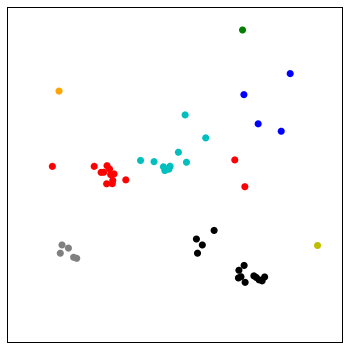

In [316]:
%matplotlib inline
#对点数据进行分组的函数
def group(data, index):
    number = np.unique(index)
    groups = []
    for i in number:
        groups.append(data[index == i])
    return groups

cls = clusters()

#只取了2列，2维点？
Y = hy.linkage(cls[:,0:2],method='complete')

cutoff = 0.3 * np.max(Y[:,2])
index = hy.fcluster(Y, cutoff,'distance')

groups = group(cls,index)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
colors = ['r','c','b','g','orange','k','y','gray']
for i,g in enumerate(groups):
    i = np.mod(i,len(colors))
    ax.scatter(g[:,0],g[:,1],c=colors[i],edgecolor='none',s=50)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
plt.show()

### 信号和图像处理
SciPy可以读写JPEG和PNG图像，不需要了解太多的图像文件本身的结构。下例使用多张国际空间站，图片进行叠加。

In [320]:
#没有找到图
if False:"""

from scipy.misc import imread,imsave
from glob import glob

files = glob('space/*.JPG')
im1 = imread(files[0].astype(np.float32))

for i in xrange(1,len(files)):
    print(i)
    im1 += imread(files[i]).astype(np.float32)

imsave('stacked_image.jpg',im1)


#下面的修改是为了让在接近地球表面时，仍然可以看到星球轨迹

# 类比较图像点的亮度，使用较亮的那个点，与PIL中的ImageChop.Lighter函数类似
def chop_lighter(image1,image2):
    s1 = np.sum(image1,axis=2)
    s2 = np.sum(image2,axis=2)
    index = s1 < s2
    image1[index,0] = image2[index,0]
    image1[index,1] = image2[index,1]
    image1[index,2] = image2[index,2]
    return image1

files = glob('space/*.JPG')
im1 = imread(files[0]).astype(np.float32)
im2 = np.copy(im1)

for i in xrange(1,len(files)):
    print(i)
    im = imread(files[i].astype(np.float32))
    im1 += im
    im2 = chop_lighter(im2,im)

imsave('stacked_image.jpg',im1/im1.max() + im2/im2.max() * 0.2)
"""

## 稀疏矩阵

NumPy能够以合理的速度处理包含 $ 10^6 $ 个元素的数组。但是一旦达到 $ 10^7 $ 个元素，则速度会变慢，并且会受限于系统的可用内存。如果这些巨大的数组中包含了0，则则可以使用稀疏矩阵。合理的使用稀疏矩阵能让内在消耗和处理时间显著的下降。

`注意`：使用ndarray和稀疏矩阵时都可以使用`nbytes`来检查它的内存占用。

使用`scipy.io`可以读写常见的稀疏矩阵文件，如：Matrix Market和HarwellBoeing或或加载MatLab文件。

In [325]:
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh
import scipy.sparse

N = 3000
m = scipy.sparse.rand(N,N)
a = m.toarray()

print('ndarray size:'+str(a.nbytes)+'bytes')
print('sparse matrix size:'+str(m.data.nbytes)+'bytes')

%timeit eigh(a)
%timeit eigsh(m)

ndarray size:72000000bytes
sparse matrix size:720000bytes
1 loops, best of 3: 6.89 s per loop
10 loops, best of 3: 56 ms per loop


## 在NumPy中读写文件

使用`scipy.io.loadmat`和`scipy.savemat`可以读写Matlab的文件格式。

在天文、几何和医学领域中使用的IDL编程语言，它保存的二进制文件也可以用NumPy提供的`scipy.io.readsav`进行读写。

至少可以使用Matrix Market格式的文件来读写矩阵数据结构。这个格式是非常通用的ASCII格式。非常多的语言（C、Fortran和Matlab）都支持这种格式。